In [94]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
from sklearn import datasets
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, RocCurveDisplay, auc, roc_curve

%matplotlib inline
pd.options.display.float_format = "{:,.2f}".format
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
params = {'axes.labelsize': 12,
         'axes.titlesize':15,
         'xtick.labelsize':12,
         'ytick.labelsize':12,
         "figure.figsize" :(10,6)}
plt.rcParams.update(params)

In [2]:
iris = datasets.load_iris()
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [13]:
# create a datafram for iris data
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.10,3.50,1.40,0.20,0
1,4.90,3.00,1.40,0.20,0
2,4.70,3.20,1.30,0.20,0
3,4.60,3.10,1.50,0.20,0
4,5.00,3.60,1.40,0.20,0


## Exploratory

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [17]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20,1.00
std,0.83,0.44,1.77,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.35,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00


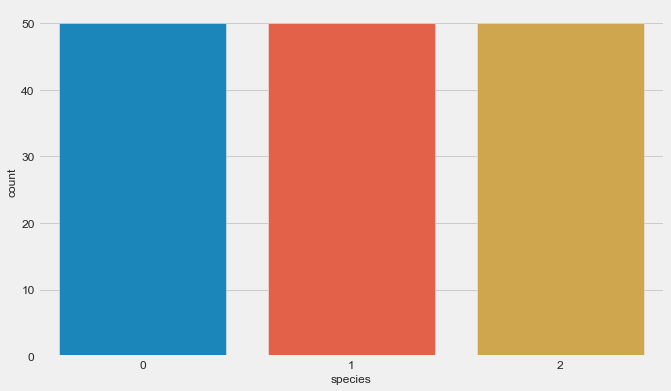

In [28]:
# check if the target is balanced
sns.countplot(df["species"]);

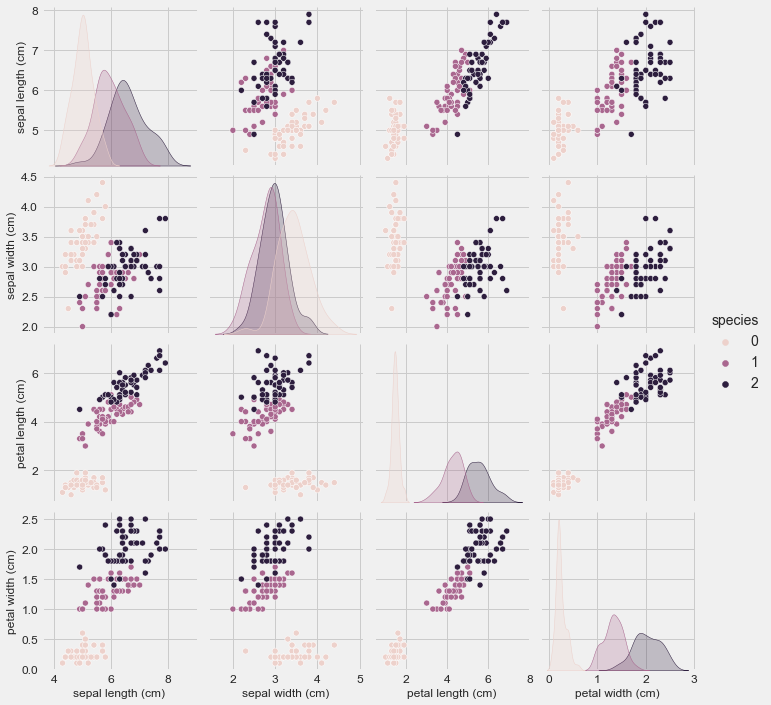

In [29]:
sns.pairplot(df, hue="species");

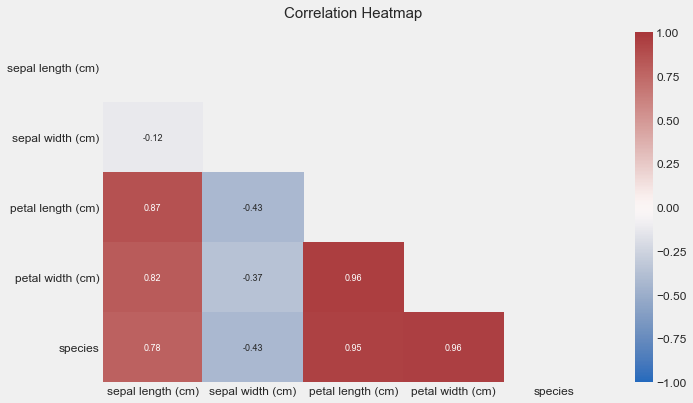

In [31]:
# define mask
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

# generate correlation map for each features and the target
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="vlag", annot_kws={"fontsize":9})
heatmap.set_title("Correlation Heatmap", fontdict={"fontsize":15}, pad=15);

## Modelling

In [38]:
X = df[iris.feature_names]
y = df["species"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [40]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## Model Evaluation

In [41]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9777777777777777


In [62]:
feature_imp = pd.Series(clf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)

As we can see from below, petal length and width are the most important features here to differentiate iris species. We can also tell by eyballing the pairplots above where 0 has very different petal length and width compared to the other two

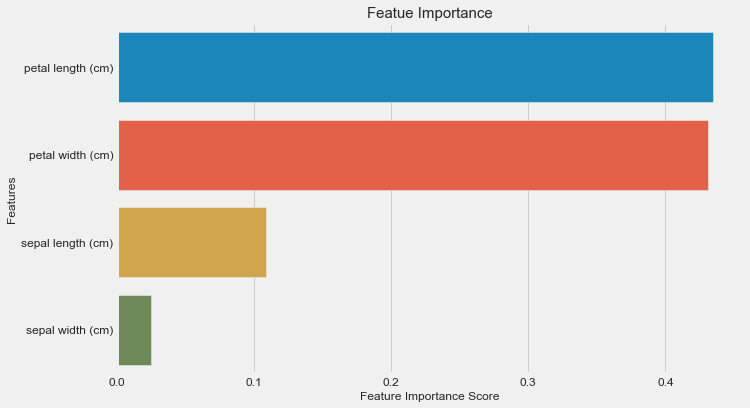

In [69]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Featue Importance");

### Confusion Matrix

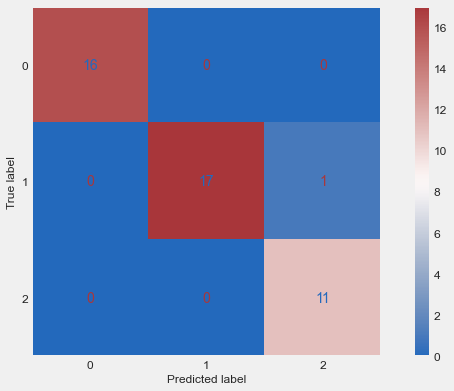

In [88]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="vlag")
plt.grid(False)
plt.show()

### Precision Recall and F1 Score

In [91]:
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### ROC (Receiver Operating Characteristics)

In [98]:
roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

0.9936914533864426